In [1]:
import os
import pandas as pd

In [16]:
dataset=os.path.join(os.path.dirname(os.getcwd()),'datasets')
red=os.path.join(dataset,'winequality-red.csv')
white=os.path.join(dataset,'winequality-white.csv')

In [17]:
dataset

'C:\\Users\\datasets'

In [24]:
red=pd.read_csv(red,sep=';')
white=pd.read_csv(white,sep=';')

In [29]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [31]:
red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [32]:
from sklearn.model_selection import train_test_split

In [40]:
new_red=red.copy()
train_red,test_red=train_test_split(new_red,test_size=0.2,random_state=42,stratify=new_red['quality'])
#randomstate는 randomseed(0)처럼 트레이닝,테스트 랜덤 뽑아놓은것들 중 42번째꺼 매번 쓰겟다 stratify는 골고루 섞기위해 quality의 수대로 층화추출

In [39]:
from sklearn.model_selection import StratifiedShuffleSplit

In [41]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge

In [46]:
import numpy as np
x=train_red['alcohol'].values.reshape(-1,1)
y=train_red['quality']
model=LinearRegression()
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [48]:
model.score(x,y) #R^2, sst 중 얼마나 설명력 가진 모델인지

0.23155091505246325

In [56]:
pred=model.predict(x)

In [53]:
from sklearn.metrics import mean_squared_error

In [57]:
from sklearn.metrics import r2_score
r2_score(y, pred)

0.23155091505246328

In [58]:
from matplotlib import pyplot as plt
%matplotlib inline

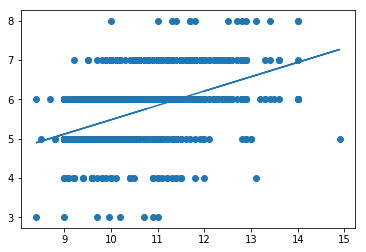

In [62]:
plt.scatter(x,y)
plt.plot(x,pred)

In [64]:
new_white=white.copy()
train_white,test_white=train_test_split(new_white,test_size=0.2,random_state=42,stratify=new_white['quality'])

In [93]:
x=train_white['alcohol'].values.reshape(-1,1)
y=train_white['quality']
model=LinearRegression()
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [94]:
model.score(x,y)

0.19067763844630373

In [95]:
pred=model.predict(x)
from sklearn.metrics import mean_squared_error
mean_squared_error(y,pred)

0.6345028468285059

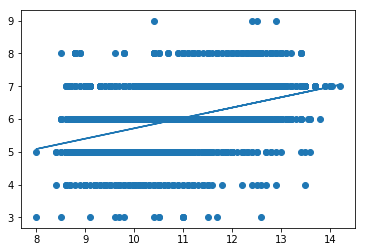

In [96]:
plt.scatter(x,y)
plt.plot(x,pred)

In [77]:
x=test_white['alcohol'].values.reshape(-1,1)
y=test_white['quality']
model=LinearRegression()
model.fit(x,y)
model.score(x,y)

0.18627080678795002

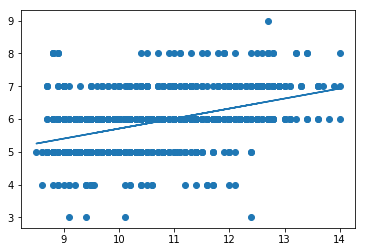

In [78]:
pred=model.predict(x)
plt.scatter(x,y)
plt.plot(x,pred)

In [79]:
y=new_red['quality']
x=new_red.drop('quality',axis=1)

In [102]:
test_x,train_x,test_y,train_y=train_test_split(x,y,test_size=0.2,random_state=55)

In [103]:
test_y.head()

706     5
3751    5
3115    6
3492    7
377     7
Name: quality, dtype: int64

In [104]:
model.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [105]:
model.score(train_x,train_y)

0.18462492706794054

In [111]:
pred=model.predict(train_x)
mean_squared_error(pred,train_y)

0.6340668233289284

In [116]:
all=white.append(red)

In [128]:
x=all.drop('quality',axis=1)
y=all['quality']

In [129]:
all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
dtypes: float64(11), int64(1)
memory usage: 819.9 KB


In [119]:
test_x,train_x,test_y,train_y=train_test_split(x,y,test_size=0.2,random_state=55)

In [120]:
model.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [121]:
model.score(train_x,train_y)

0.32908822955853334

In [122]:
pred=model.predict(train_x)
mean_squared_error(pred,train_y)

0.5221202133045071

In [222]:
dataset=os.path.join(os.path.dirname(os.getcwd()),'datasets')
red=os.path.join(dataset,'winequality-red.csv')
white=os.path.join(dataset,'winequality-white.csv')

In [223]:
red=pd.read_csv(red,sep=';')
white=pd.read_csv(white,sep=';')

In [224]:
new_red=red.copy()
new_white=white.copy()

In [225]:
new_red['class']=0
new_white['class']=1

In [226]:
alll=new_red.append(new_white,ignore_index=True)

In [227]:
alll.count()

fixed acidity           6497
volatile acidity        6497
citric acid             6497
residual sugar          6497
chlorides               6497
free sulfur dioxide     6497
total sulfur dioxide    6497
density                 6497
pH                      6497
sulphates               6497
alcohol                 6497
quality                 6497
class                   6497
dtype: int64

In [237]:
x = alll[['volatile acidity', 'sulphates']]
y = alll['class']
train_x, test_x, train_y, test_y = train_test_split(x, y, stratify=alll['class'],random_state=52)

In [238]:
red_index=train_y[train_y==0].index
white_index=train_y[train_y==1].index

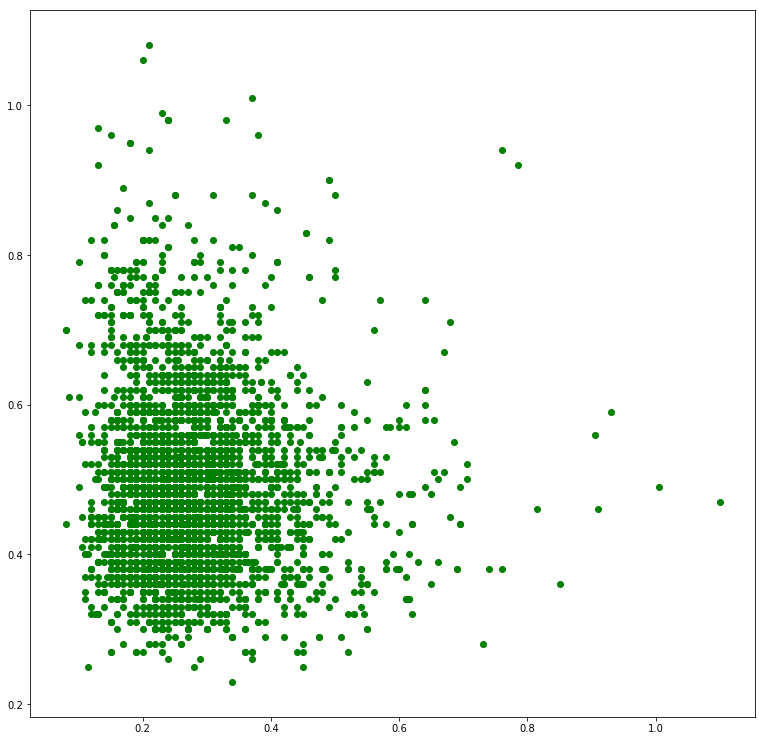

In [239]:
plt.figure(figsize=(13,13))
plt.scatter(x=train_x.loc[white_index,'volatile acidity'],y=train_x.loc[white_index,'sulphates'],color='g')

In [240]:
from sklearn.linear_model import LogisticRegression

In [241]:
lo_reg=LogisticRegression()
lo_reg.fit(train_x,train_y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [242]:
lo_reg.predict_proba(test_x)

array([[0.00596317, 0.99403683],
       [0.01417046, 0.98582954],
       [0.17204916, 0.82795084],
       ...,
       [0.0081798 , 0.9918202 ],
       [0.06800745, 0.93199255],
       [0.14674821, 0.85325179]])

(0.3, 0.9)

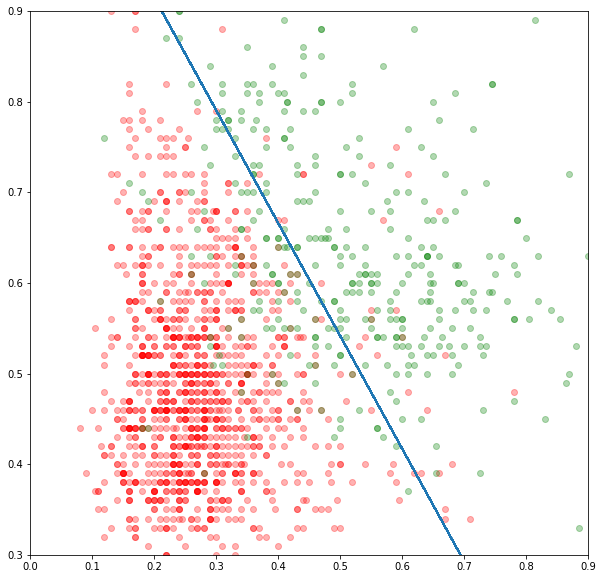

In [258]:
red_index=test_y[test_y==0].index
white_index=test_y[test_y==1].index
plt.figure(figsize=(10,10))
plt.scatter(x=test_x.loc[white_index, 'volatile acidity'], y=test_x.loc[white_index, 'sulphates'], color='r', alpha=0.3)
plt.scatter(x=test_x.loc[red_index, 'volatile acidity'], y=test_x.loc[red_index, 'sulphates'], color='g',  alpha=0.3)

#x2=-(w1x1+wo)/w2
wy = -(test_x.iloc[:, 0] * lo_reg.coef_[0,0] + lo_reg.intercept_)/(lo_reg.coef_[0,1])

plt.plot(test_x.iloc[:, 0], wy)
plt.xlim(0, .9)
plt.ylim(0.3, .9)

In [291]:
x1=alll[['total sulfur dioxide','fixed acidity']]
y1=alll['class']
train_x1, test_x1, train_y1, test_y1 = train_test_split(x1, y1, stratify=alll['class'],random_state=52)

In [292]:
lo_reg=LogisticRegression()
lo_reg.fit(train_x1,train_y1)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [293]:
lo_reg.score(train_x,train_y)

0.7538998357963875

(0, 200)

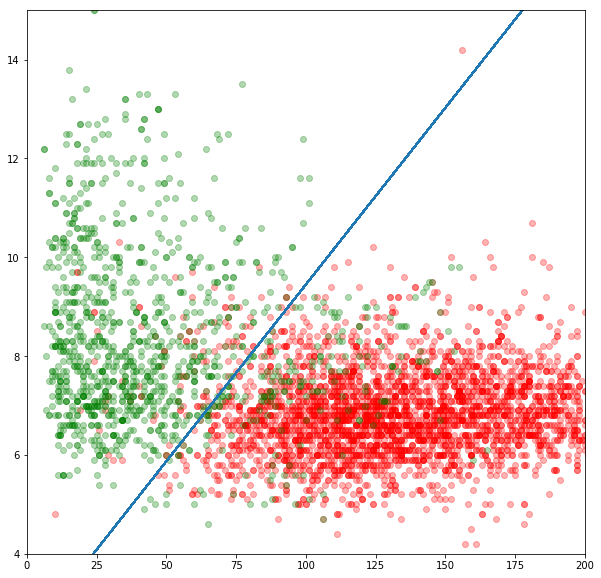

In [309]:
red_index=train_y1[train_y1==0].index
white_index=train_y1[train_y1==1].index
plt.figure(figsize=(10,10))
plt.scatter(x=train_x1.loc[white_index, 'total sulfur dioxide'], y=train_x1.loc[white_index, 'fixed acidity'], color='r', alpha=0.3)
plt.scatter(x=train_x1.loc[red_index, 'total sulfur dioxide'], y=train_x1.loc[red_index, 'fixed acidity'], color='g',  alpha=0.3)
wy = -(train_x1.iloc[:, 0] * lo_reg.coef_[0,0] + lo_reg.intercept_)/(lo_reg.coef_[0,1])
plt.plot(train_x1.iloc[:, 0], wy)
plt.ylim(4,15)
plt.xlim(0,200)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


(0, 200)

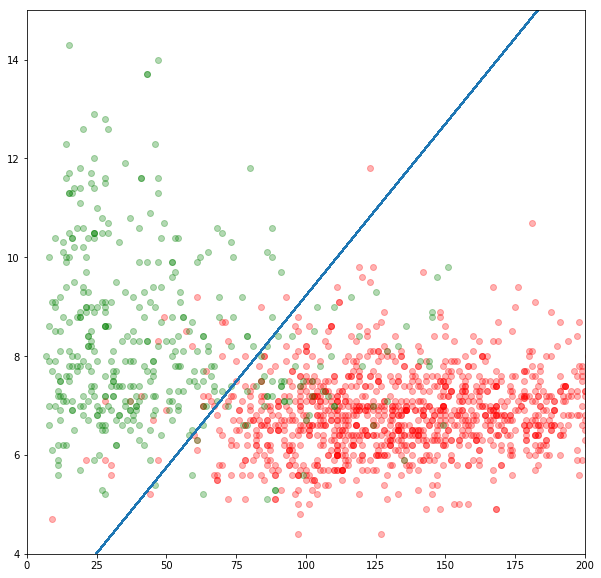

In [311]:
lo_reg=LogisticRegression()
lo_reg.fit(test_x1,test_y1)
red_index=test_y1[test_y1==0].index
white_index=test_y1[test_y1==1].index
plt.figure(figsize=(10,10))
plt.scatter(x=test_x1.loc[white_index, 'total sulfur dioxide'], y=test_x1.loc[white_index, 'fixed acidity'], color='r', alpha=0.3)
plt.scatter(x=test_x1.loc[red_index, 'total sulfur dioxide'], y=test_x1.loc[red_index, 'fixed acidity'], color='g',  alpha=0.3)
wy = -(test_x1.iloc[:, 0] * lo_reg.coef_[0,0] + lo_reg.intercept_)/(lo_reg.coef_[0,1])
plt.plot(test_x1.iloc[:, 0], wy)
plt.ylim(4,15)
plt.xlim(0,200)

In [312]:
import sklearn
sklearn.__version__

'0.20.3'

In [314]:
x=white.drop('quality',axis=1)
y=white['quality']

In [316]:
train_x, test_x, train_y, test_y = train_test_split(x, y, random_state=52)

In [317]:
log_reg=LogisticRegression().fit(train_x,train_y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [319]:
log_reg.score(train_x,train_y)

0.5287231146202015

In [321]:
pred=log_reg.predict(train_x)

In [326]:
arr1=log_reg.predict_proba(train_x)

In [358]:
from math import exp
summ=0
for i in range(0,7):
    a=exp(arr1[0][i]**2)
    summ+=a
print(a/summ)
    

0.1341732732531009


In [ ]:
log_reg=LinearRegression(solver='lbfgs',multi_class,max_iter=1000)

In [359]:
arr1




















































































































































array([[4.45371317e-03, 1.81419458e-02, 4.73945683e-01, ...,
        7.02564518e-02, 9.97199968e-03, 3.63699890e-04],
       [6.89576041e-03, 1.93262767e-03, 9.49258052e-02, ...,
        3.24493422e-01, 1.22617271e-01, 4.79570951e-03],
       [4.01750672e-03, 3.85493842e-02, 2.27907491e-01, ...,
        1.82471149e-01, 1.64667356e-02, 1.01563292e-03],
       ...,
       [4.92153179e-03, 6.26788905e-02, 4.44707985e-01, ...,
        7.89889466e-02, 1.56864291e-02, 1.72880189e-03],
       [3.64015726e-03, 4.53384337e-03, 9.65908244e-02, ...,
        3.15288117e-01, 5.43613657e-02, 1.99143383e-03],
       [1.40795898e-03, 8.95788425e-03, 1.28340598e-01, ...,
        2.89360574e-01, 3.46870794e-02, 1.99756433e-04]])